Provide an R or Python (with markdown) file for the independent samples t-test for Invisibility Cloak data set.
The file should have all the codes/and or explanations from Assumption 1 to 5 and computation.
Present the results of the analysis by making a short report.

Summary of Mischief variable:
count    24.000000
mean      4.375000
std       1.860633
min       0.000000
25%       3.750000
50%       5.000000
75%       5.250000
max       8.000000
Name: Mischief, dtype: float64 

Frequency of each group in Cloak variable:
Cloak
0    12
1    12
Name: count, dtype: int64 

Unique participants: 24
Total rows: 24
If these numbers are the same, independence assumption is satisfied.



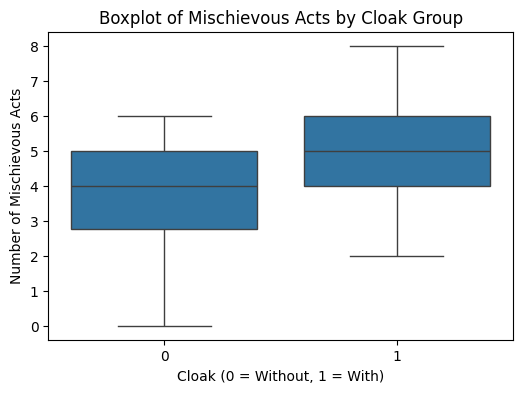

Shapiro-Wilk Normality Test Results:
Cloak Group 0: W=0.913, p=0.231
Normally distributed (assumption met)

Cloak Group 1: W=0.973, p=0.936
Normally distributed (assumption met)

Levene’s Test for Equality of Variances: F=0.270, p=0.609
Equal variances assumed (assumption met)

Independent Samples t-Test Results
t-statistic = -1.713
p-value = 0.101
Mean difference (With - Without) = 1.250

95% Confidence Interval for Mean Difference: [-0.263, 2.763]

Independent Samples t-Test Report
Group 0 (Without Cloak): mean = 3.75
Group 1 (With Cloak): mean = 5.00
t(22) = -1.713, p = 0.101

There is NO significant difference between the two groups.
This means the invisibility cloak did not affect how mischievous people behaved.


In [ ]:

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/Invisibility Cloak.csv')
data.head()


# Assumption 1: Dependent variable (Mischief) is continuous
# Let's look at its summary
print("Summary of Mischief variable:")
print(data['Mischief'].describe(), "\n")

# Assumption 2: The independent variable (Cloak) has two independent groups
# 0 means without cloak, 1 means with cloak
print("Frequency of each group in Cloak variable:")
print(data['Cloak'].value_counts(), "\n")

# Assumption 3: Independence of observations
# Each participant should appear only once.
print("Unique participants:", data['Participant'].nunique())
print("Total rows:", len(data))
print("If these numbers are the same, independence assumption is satisfied.\n")

# Assumption 4: Check for outliers using a boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x='Cloak', y='Mischief', data=data)
plt.title('Boxplot of Mischievous Acts by Cloak Group')
plt.xlabel('Cloak (0 = Without, 1 = With)')
plt.ylabel('Number of Mischievous Acts')
plt.show()

# Assumption 5: Test for normality using Shapiro-Wilk test
# If p > 0.05, it means the data is normally distributed
cloak_groups = data.groupby('Cloak')['Mischief']

print("Shapiro-Wilk Normality Test Results:")
for group, values in cloak_groups:
    stat, p = stats.shapiro(values)
    print(f'Cloak Group {group}: W={stat:.3f}, p={p:.3f}')
    if p > 0.05:
        print("Normally distributed (assumption met)\n")
    else:
        print("Not normally distributed (assumption violated)\n")

# Assumption 6: Test for equal variances using Levene’s test
cloak0 = data[data['Cloak'] == 0]['Mischief']
cloak1 = data[data['Cloak'] == 1]['Mischief']

levene_stat, levene_p = stats.levene(cloak0, cloak1)
print(f"Levene’s Test for Equality of Variances: F={levene_stat:.3f}, p={levene_p:.3f}")
if levene_p > 0.05:
    print("Equal variances assumed (assumption met)\n")
else:
    print("Variances are not equal (use Welch’s correction instead)\n")

# Since Levene’s test is not significant, we assume equal variances.
t_stat, p_value = stats.ttest_ind(cloak0, cloak1, equal_var=True)

# Compute the mean difference manually
mean_diff = cloak1.mean() - cloak0.mean()

print("Independent Samples t-Test Results")
print("===================================")
print(f"t-statistic = {t_stat:.3f}")
print(f"p-value = {p_value:.3f}")
print(f"Mean difference (With - Without) = {mean_diff:.3f}\n")

# Compute 95% confidence interval for the mean difference
n0, n1 = len(cloak0), len(cloak1)
s_pooled = np.sqrt(((n0-1)*np.var(cloak0, ddof=1) + (n1-1)*np.var(cloak1, ddof=1)) / (n0+n1-2))
se_diff = s_pooled * np.sqrt(1/n0 + 1/n1)
df = n0 + n1 - 2

ci_low = mean_diff - stats.t.ppf(0.975, df) * se_diff
ci_high = mean_diff + stats.t.ppf(0.975, df) * se_diff
print(f"95% Confidence Interval for Mean Difference: [{ci_low:.3f}, {ci_high:.3f}]\n")

# Short Report

print("Independent Samples t-Test Report")
print("==================================")
print(f"Group 0 (Without Cloak): mean = {cloak0.mean():.2f}")
print(f"Group 1 (With Cloak): mean = {cloak1.mean():.2f}")
print(f"t({df}) = {t_stat:.3f}, p = {p_value:.3f}")

if p_value < 0.05:
    print("\nThere is a significant difference between the two groups.")
    print("People with an invisibility cloak committed a different number of mischievous acts compared to those without one.")
else:
    print("\nThere is NO significant difference between the two groups.")
    print("This means the invisibility cloak did not affect how mischievous people behaved.")
